# CSC 448 - Final Project


## Abstract

In this notebook, we will take a look at two datasets -- the World Happiness Report 2021 and a dataset for heart attack classification.

For a long time, the overall happiness level of the people in a nation was not something to be measured. Success was primarily measured by the state of the economy, and some might argue it still is in many parts of the world. Now, I want to see if there is a strong positive correlation between these 2 variables. 


According to the CDC, heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. One person dies every 36 seconds in the United States from cardiovascular disease. About 655,000 Americans die from heart disease each year — that's 1 in every 4 deaths. For these reasons, I want to see if given several columns of data, I could classify a person as someone who would get a heart attack diagnosis. I will use a logistic regression for the classification because it can properly categorize multiple columns as 0 or 1 (no heart attack vs heart attack). 



## Section 1: Regression Dataset Prep


The World Happiness Report 2021 dataset contains the following columns:

1. Country name - name of the country
2. Regional indicator - region the country belongs to
3. Ladder score - happiness index, ranging from 0 to 10
4. Standard error of ladder score - a measure of the statistical accuracy of the estimated ladder score
5. upperwhisker - upper whisker of the box and whisker plot
6. lowerwhisker - lower whisker of the box and whisker plot
7. Logged GDP per capita - the natural log of a country's GDP per capita
8. Social support 
9. Healthy life expectancy
10. Freedom to make life choices
11. Generosity
12. Perceptions of corruption
13. Ladder score in Dystopia
14. Explained by: Log GDP per capita
15. Explained by: Social support
16. Explained by: Healthy life expectancy
17. Explained by: Freedom to make life choices
18. Explained by: Generosity
19. Explained by: Perceptions of corruption
20. Dystopia + residual


Here is the dataset:

In [22]:
import numpy as np
import pandas as pd

# Using pandas to load and output the first 15 rows of the World Happiness Report 2021 dataset
regression_data = pd.read_csv("../../happiness_report/world-happiness-report-2021.csv") 
regression_data.head(15)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


The columns I will be using on my regression are:

1. Logged GDP per capita - the natural log of a country's GDP per capita, ln(total GDP / population). This will be used as a feature.
2. Ladder score - measure of the overall happiness of people in a given country. This is what we want to predict.

## Section 2: Regression


In [39]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# getting the logged GDP per capita column as a subset of the data to use for features
x = regression_data[["Logged GDP per capita"]]

# getting the ladder score as a subset of the data to use for prediction
y = regression_data["Ladder score"]

# using sklearn to split the data between a testing and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle=True)

In [40]:
reg = linear_model.LinearRegression().fit(x_train, y_train)

Coefficients: 
 [0.71561051]
Mean squared error: 0.38691569224836136
Coefficient of determination: 0.6528568145516126
Score gotten from cross-validation: 0.6528568145516126


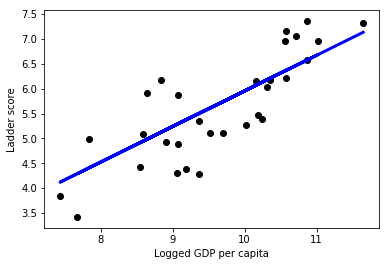

In [41]:
import matplotlib.pyplot as plt

pred = reg.predict(x_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error:", mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:",r2_score(y_test, pred))
# Score
print("Score gotten from cross-validation:",reg.score(x_test,y_test))

plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, pred, color='blue', linewidth=3)


plt.xlabel("Logged GDP per capita")
plt.ylabel("Ladder score")

plt.show()

It looks like what the data is telling us is that as the logged GDP per capita increases, so too does a nation's ladder score. However, the score of the linear regression here is approximately 0.65. That is not a very accurate result, so I would say the regression did not work as well as I would have hoped. 

The mean squared error is approximately 0.39, so this regression does not do a good job at predicting the ladder score of a nation given its logged GDP per capita. This could possibly be because there isn't a strong correlation between the 2 variables and other variables have a stronger impact on the ladder score. For this reason, the linear regression was not able to make accurate predictions.

## Section 3: Classification Dataset Prep

The heart attack classification dataset contains the following columns:

1. age - age of the person in years (range of 0 to 110)
2. sex - sex (1 = male, 0 = female)
3. cp - chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain; 0 = asymptomatic)
4. trtbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholesterol in mg/dl fetched via BMI sensor
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)
8. thalachh - maximum heart rate achieved
9. exng - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slp - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
12. caa - number of major vessels (0-3) colored by flouroscopy
13. thall - the thal rate, 2 = normal; 1 = fixed defect; 3 = reversible defect
14. output - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 is < 50% diameter narrowing, Value 1 is > 50% diameter narrowing)

In [30]:
classification_data = pd.read_csv("../../heart.csv") 
classification_data.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In this classification, I want to see if given the following information about a person: age, sex, chest pain type, and the presence of exercise-induced angina, I can predict a heart attack diagnosis in a patient.

## Section 4: Classification with Logistic Regression




In [36]:
x = classification_data[["age", "sex", "cp", "exng"]]
y = classification_data["output"]

# using sklearn to split the data between a testing and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, train_size = 0.67, shuffle=True)


In [37]:
clf = linear_model.LogisticRegression(solver="lbfgs").fit(x_train, y_train)

# The coefficients
print("Coefficients: \n", clf.coef_)
# The mean squared error
print("Mean squared error:",mean_squared_error(y_test, clf.predict(x_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:",r2_score(y_test, clf.predict(x_test)))
# Score
print("\nScore:",clf.score(x_test, y_test))

Coefficients: 
 [[-0.06573582 -1.32434079  0.61328581 -1.42163402]]
Mean squared error: 0.21
Coefficient of determination: 0.15458937198067624

Score: 0.79


The score of the logistic regression here is 0.79, and there is a mean squared error of 0.21, so we were able to accurately classify the output for people 79% of the time, using 33% of the dataset as the test set. This is a fairly accurate result, which means the classifier is somewhat useful in predicting heart attack diagnoses in human patients. 

## Conclusion

Summarize the findings of your report
Repeat your methodology and key findings for each model
Highlight what you found interesting
Discuss what you would do to extend the project further